<a href="https://colab.research.google.com/github/parul33/Deeplearning/blob/main/yolo26sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import cv2
 import numpy as np
 from google.colab.patches import cv2_imshow


In [ ]:
 print("LOADING YOLO")
 net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

LOADING YOLO


In [ ]:
 classes = []
 with open("coco.names", "r") as f:classes = [line.strip() for line
in f.readlines()]


In [ ]:
 layer_names = net.getLayerNames()


In [ ]:
 output_layers = [layer_names[i - 1] for i in
 net.getUnconnectedOutLayers()]
 print("YOLO LOADED")


YOLO LOADED


Input Image:


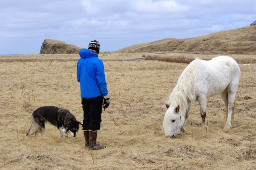

In [ ]:
 img = cv2.imread("person.jpg")
 img = cv2.resize(img, None, fx=0.4, fy=0.4)
 height, width, channels = img.shape
 print("Input Image:")
 cv2_imshow(img)


In [ ]:
 blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416),
swapRB=True,crop=False)

In [ ]:
 net.setInput(blob)
 outs = net.forward(output_layers)


In [ ]:
class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.3:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


In [ ]:
# We use NMS function in OpenCV to perform Non-maximum Suppression.
# We give it score threshold and NMS threshold as arguments.
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


In [ ]:
import numpy as np
import cv2

# Assuming 'boxes', 'class_ids', 'confidences', 'classes', and 'indexes' are already defined

colors = np.random.uniform(0, 255, size=(len(classes), 3))

for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]

        # Draw the bounding box
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

        # Draw the label
        cv2.putText(img, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        print(f"Detected object: {label}, confidence: {confidences[i]}, box: {x}, {y}, {w}, {h}")


Detected object: horse, confidence: 0.9975360631942749, box: 159, 53, 84, 83
Detected object: dog, confidence: 0.9832477569580078, box: 24, 104, 58, 35
Detected object: person, confidence: 0.9999039173126221, box: 76, 36, 33, 113


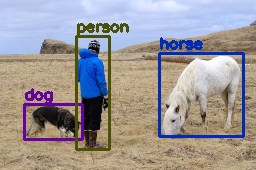

-1

In [ ]:
 cv2_imshow(img)
 cv2.waitKey(0)